In [1]:
%load_ext autoreload
%autoreload 2

from b2analysis import Histogram
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/06


Create some random data following a normal distribution:

In [3]:
data = np.random.normal(0,2,10000)

Create a histogramm with 100 bins and plot it:

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='events'>)

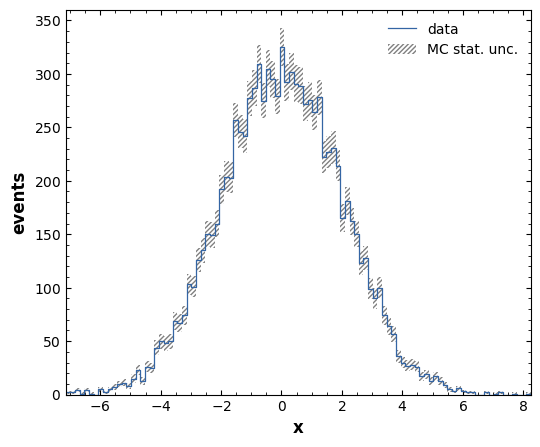

In [7]:
hist1 = Histogram("data", data, 0,  var="x", bins=100)
hist1.plot(histtype="step")

Create a histogram with 100 bins in a given range showing the overlow and underflow bin:

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='events'>)

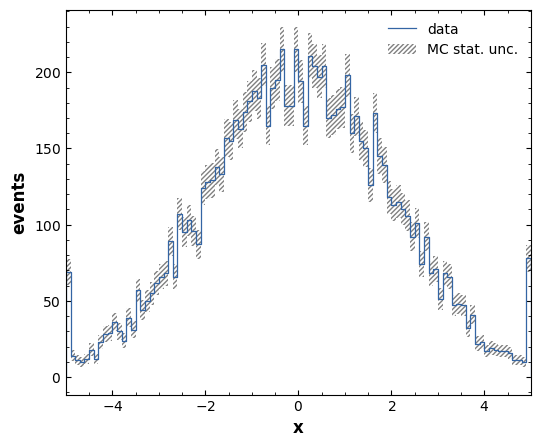

In [5]:
hist2 = Histogram("data", data, 0, var="x", range=(-5,5), overflow_bin=True, bins=100)
hist2.plot(histtype="step")

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='events'>)

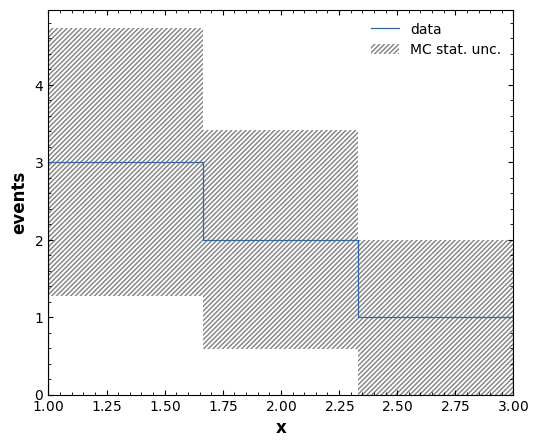

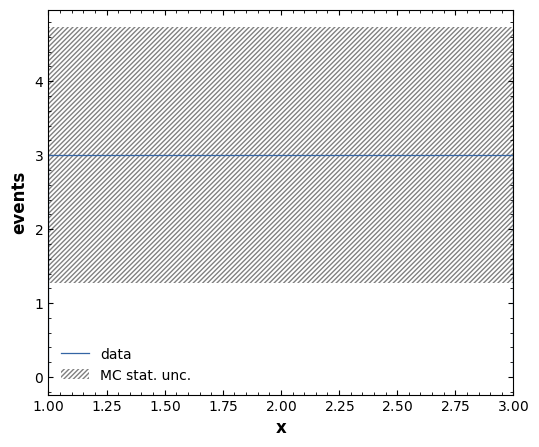

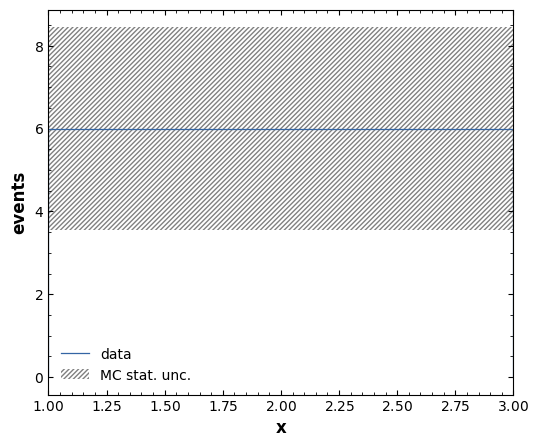

In [9]:
Histogram("data", np.array([1,1,1,2,2,3]), 0, var="x", overflow_bin=True, bins=3).plot(histtype="step")
Histogram("data", np.array([1,1,1,2,2,3]), 0, var="x", overflow_bin=True, bins=3, weights=np.array([1,1,1,3/2,3/2,3])).plot(histtype="step")
Histogram("data", np.array([1,1,1,2,2,3]), 0, var="x", lumi_scale=2, overflow_bin=True, bins=3, weights=np.array([1,1,1,3/2,3/2,3])).plot(histtype="step")

## Weights

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='events'>)

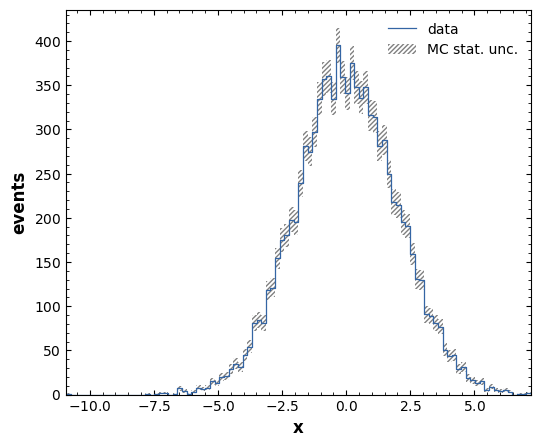

In [3]:
weights1 = np.full(data.size, 1)
hist1 = Histogram("data", data, 0,  weights=weights1, var="x", bins=100)
hist1.plot(histtype="step")

In [10]:
err1 = hist1.calc_weighted_uncert(data=data, weights=weights1, bin_edges=hist1.bin_edges)

In [11]:
hist1.err == err1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='events'>)

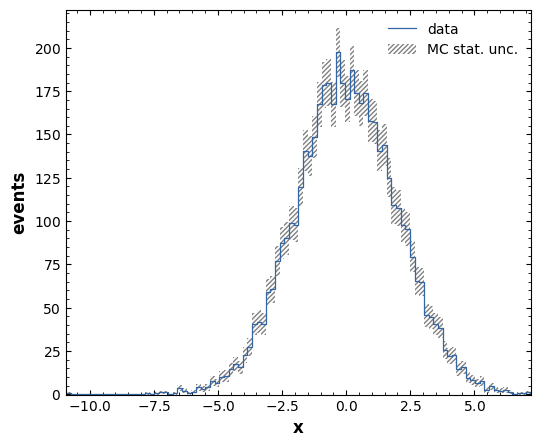

In [12]:
weights2 = np.full(data.size, 0.5)
hist2 = Histogram("data", data, 0,  weights=weights2, var="x", bins=100)
hist2.plot(histtype="step")

In [13]:
err2 = hist2.calc_weighted_uncert(data=data, weights=weights2, bin_edges=hist2.bin_edges)

In [14]:
err2/err1

/tmp/ipykernel_15018/296571274.py:1: RuntimeWarning: invalid value encountered in divide
  err2/err1


array([0.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 0.5, nan, 0.5, 0.5, 0.5, nan, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, nan, 0.5, 0.5, 0.5])

(<Figure size 600x500 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='events'>)

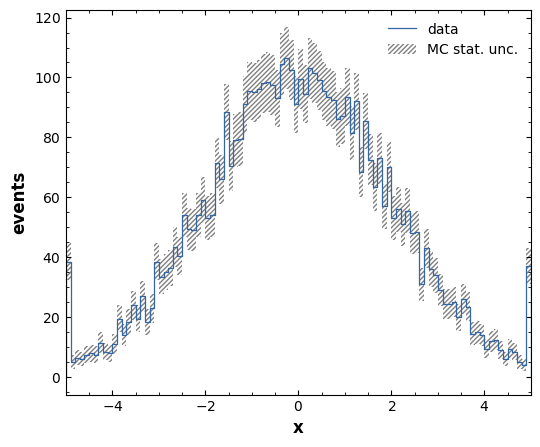

In [15]:
weights2 = np.full(data.size, 0.5)
hist2_o = Histogram("data", data, 0,  weights=weights2, var="x", bins=100, range=(-5,5), overflow_bin=True)
hist2_o.plot(histtype="step")

## Histogram Operations

In [5]:
data1 = np.random.normal(0,2,10000)
data2 = np.random.normal(0,1.5,10000)

create colors...
{'data1': array([0.06533633, 0.16224877, 0.46698002, 1.        ]), 'data2': array([0.76849839, 0.6447    , 0.43456357, 1.        ])}
dict_keys(['data1', 'data2'])




(<Figure size 540x540 with 2 Axes>,
 array([<AxesSubplot: title={'left': 'Belle II', 'right': '$\\int \\mathcal{L} \\,\\mathrm{d}t=0\\,\\mathrm{fb}^{-1}$'}, xlabel='x', ylabel='events'>,
        <AxesSubplot: xlabel='x', ylabel='$\\mathbf{\\frac{data2}{data1}}$'>],
       dtype=object))

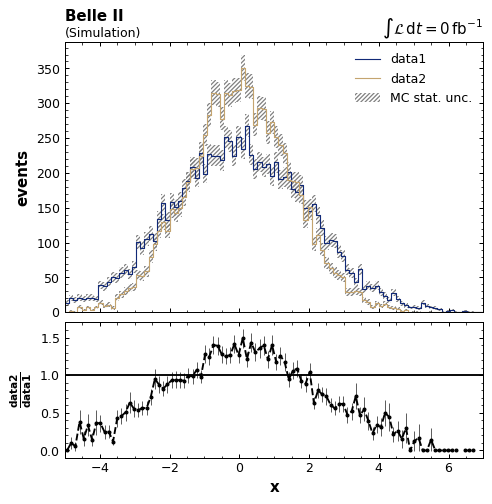

In [36]:
from b2analysis import HistogramCanvas

hist1 = Histogram("data1", data1, 0,  var="x", bins=100, range=[-5,7])
hist2 = Histogram("data2", data2, 0,  var="x", bins=100, range=[-5,7])

canvas = HistogramCanvas(lumi=0, var="x")
canvas.add_histogram(hist1)
canvas.add_histogram(hist2)

pull_args = {"hist_name": "data2", "nom_hist_name": "data1", "xlabel": "x"}

canvas.pull_plot(histtype="step", pull_args=pull_args)

create colors...

{'ratio': array([0.06533633, 0.16224877, 0.46698002, 1.        ]), 'ratio1': array([0.26771184, 0.59904649, 0.29404223, 1.        ]), 'ratio2': array([0.76849839, 0.6447    , 0.43456357, 1.        ])}
dict_keys(['ratio', 'ratio1', 'ratio2'])




(<Figure size 540x360 with 1 Axes>,
 <AxesSubplot: title={'left': 'Belle II', 'right': '$\\int \\mathcal{L} \\,\\mathrm{d}t=0\\,\\mathrm{fb}^{-1}$'}, xlabel='x', ylabel='events'>)

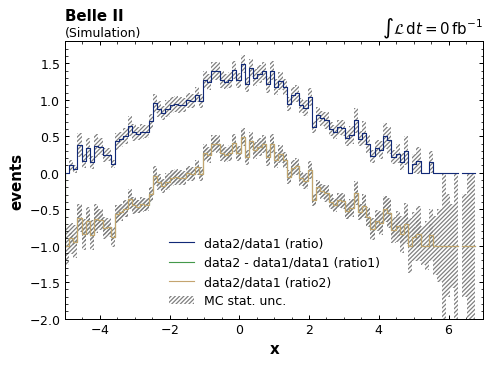

In [35]:
hist_ratio = hist2/hist1
hist_ratio_1 = (hist2-hist1)/hist1
hist_ratio_2 = hist2/hist1-hist1/hist1

hist_ratio.name = "ratio"
hist_ratio_1.name = "ratio1"
hist_ratio_2.name = "ratio2"

hist_ratio.label += " (ratio)"
hist_ratio_1.label += " (ratio1)"
hist_ratio_2.label += " (ratio2)"

canvas = HistogramCanvas(lumi=0, var="x")
canvas.add_histogram(hist_ratio)
canvas.add_histogram(hist_ratio_1)
canvas.add_histogram(hist_ratio_2)

canvas.plot(histtype="step", figsize=(6,4))

### Check if Uncertainties are equual

-8.689525563911472


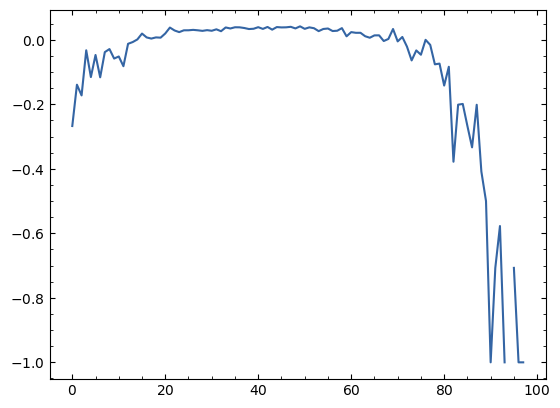

In [32]:
print(np.nansum((hist_ratio.err-hist_ratio_1.err)))
import matplotlib.pyplot as plt
plt.plot((hist_ratio.err-hist_ratio_1.err))

0.0


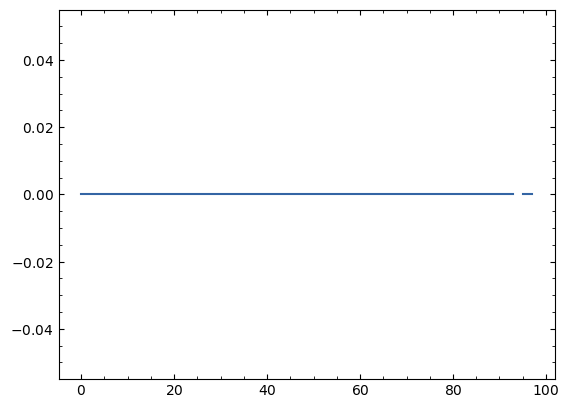

In [31]:
print(np.nansum((hist_ratio.err-hist_ratio_2.err)))
import matplotlib.pyplot as plt
plt.plot((hist_ratio.err-hist_ratio_2.err))